<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/nlp/%5Bclassify%5D_ml_svm_or_lsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#download data
!gdown --id 1-avUDygRCGvAiPplmc6MundS_PpnohRv
!gdown --id 106OVRPIQQBppganRnCZigxQh6-Zyvqit

#pythainlp
!pip install pythainlp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 34.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 30.6MB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#data

In [41]:
train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [42]:
train.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...


In [43]:
test.head(1)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_SV-FSI-20201101-29-20201201-25_Sampl...,NaN,NaN,SocialMedia,Pantip,5fdb2543b08b582c303ceba3,Q202106_4598,Q202106_4598_1,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,ในอนาคตธนาคารเกียรตินาคินภัทรจะมีบัตรเครดิตไหม...,"Product and Service, Variety",10,neutral,o,ในอนาคต|ธนาคาร|kk|ภัทร|จะ|มี|บัตรเครดิต|ไหม|คร...


#preprocess

In [75]:
df = pd.concat([train, test])

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Text_ws_local'], df['Human_CategoryID'], stratify=df['Human_CategoryID'])

In [77]:
def text_tokenizer(text):
  from pythainlp.tokenize import word_tokenize
  return word_tokenize(text, engine="newmm", keep_whitespace=False)

In [78]:
tfidf = TfidfVectorizer(tokenizer=text_tokenizer, ngram_range=(3,4), sublinear_tf=True)
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

#model

In [79]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [80]:
clf = make_pipeline(StandardScaler(with_mean=False),  LinearSVC(tol=1e-5))

##plain word_tokenize, , tol=1e-5
#svc = 0.49, ngram(1,2)

#lsvc = 0.52, ngram(1,2)
#lsvc = 0.57, ngram(3,4)
#lsvc = 0.47, ngram(3,10)

##word_tokenize = word_tokenize(text, engine="newmm", keep_whitespace=False), , tol=1e-5
#lsvc = 0.52, ngram(1,2)

#lsvc = 0.59, ngram(3,4)

#lsvc = 0.48, ngram(5,6)
#lsvc = 0.49, ngram(3,10)

In [81]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearsvc', LinearSVC(tol=1e-05))])

#predict and analysis

In [82]:
preds = clf.predict(x_test)

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.86      0.25      0.39        48
           2       0.00      0.00      0.00         4
           3       0.50      0.06      0.11        97
           4       0.72      0.13      0.23       135
           5       0.71      0.58      0.64       298
           6       0.75      0.55      0.63       285
           7       0.67      0.85      0.75       840
           8       0.56      0.65      0.60       637
           9       0.67      0.10      0.17        41
          10       0.40      0.08      0.14        98
          11       0.19      0.07      0.10        60
          12       0.43      0.08      0.13        39
          13       0.38      0.53      0.44       553

    accuracy                           0.58      3135
   macro avg       0.53      0.30      0.33      3135
weighted avg       0.59      0.58      0.55      3135



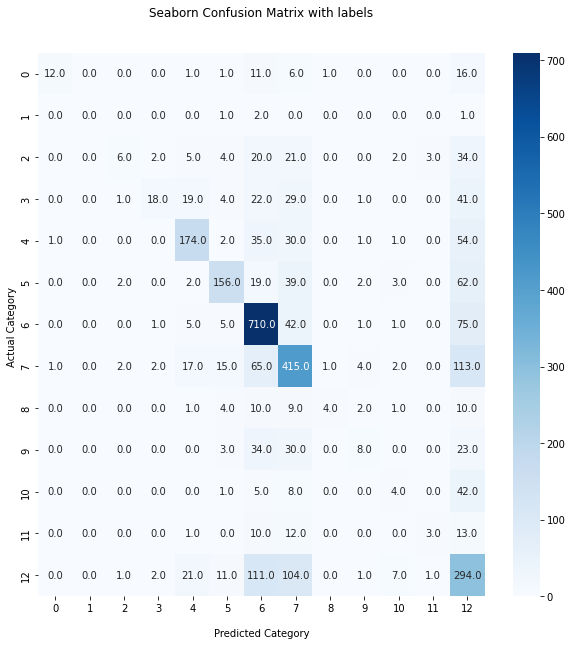

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, preds)

fig, ax = plt.subplots(figsize=(10,10))    
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax, fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(classes_array, rotation=90)
# ax.yaxis.set_ticklabels(classes_array, rotation=0)

## Display the visualization of the Confusion Matrix.
plt.show()

figure = ax.get_figure()    
figure.savefig("cf_matrix.png", pad_inches= 12, dpi=400)